# B3: Toya Data 13C MFA 

# Intro

# Setup

First, we need to set the path and environment variable properly:

In [1]:
quantmodelDir = '/users/hgmartin/libraries/quantmodel'

This is the only place where the jQMM library path needs to be set.

In [2]:
%matplotlib inline

import sys, os
pythonPath = quantmodelDir+"/code/core"
if pythonPath not in sys.path:
    sys.path.append(pythonPath)
os.environ["QUANTMODELPATH"] = quantmodelDir

In [3]:
%matplotlib inline
import os, core, FluxModels, unittest, enhancedLists
from IPython.display import SVG

And move to a scratch directory (to make things faster):

In [4]:
cd /scratch/hgmartin_scratch/tests

/scratch/hgmartin_scratch/tests


## Flux calculation 

In [5]:
import os
strain = 'wt5h'
qmodeldir         = os.environ['QUANTMODELPATH']    
dirDATA           = qmodeldir+'/data/tests/Toya2010/C13/'+strain+'/' 
    
# Get sbml file
REACTIONSfilename   = dirDATA + 'REACTIONS'+strain+'.txt' 
FEEDfilename        = dirDATA + 'FEED'+strain+'.txt'
CEMSfilename        = dirDATA + 'GCMS'+strain+'.txt'
CEMSSTDfilename     = dirDATA + 'GCMSerr'+strain+'.txt'
FLUXESFreefilename  = dirDATA + 'FLUX'+strain+'.txt'

atomTransitions = enhancedLists.AtomTransitionList(REACTIONSfilename)
ReacNet = atomTransitions.getReactionNetwork('E. coli wt5h 13C MFA')
ReacNet.addLabeling(CEMSfilename,'LCMSLabelData',CEMSSTDfilename,minSTD=0.001)
ReacNet.addFeed(FEEDfilename)
ReacNet.loadFluxBounds(FLUXESFreefilename)
    
names = ['2DDA7Pbm','3PHPbm','ACACCT','ALAbm','AcCoabm','CO2bm','F6Pbm','G6Pbm'
         ,'GLCpts','GLUbm','OAAbm','PEPbm','PYRbm','R5Pbm','VALbm']
ReacNet.write('TOYAnew.sbml')    

# Get FIT fluxes
C13modelNew = FluxModels.C13Model('TOYAnew.sbml')   
C13modelNew.reactionNetwork.fixFluxes(names)
fluxNames = C13modelNew.reactionNetwork.reactionList.getReactionNameList(level=1)
resultsNew = C13modelNew.findFluxesRanges(Nrep=10,fluxNames=fluxNames, procString='proc') 



svgin:
/users/hgmartin/libraries/quantmodel/code/core/TOYA13CMFA.svg


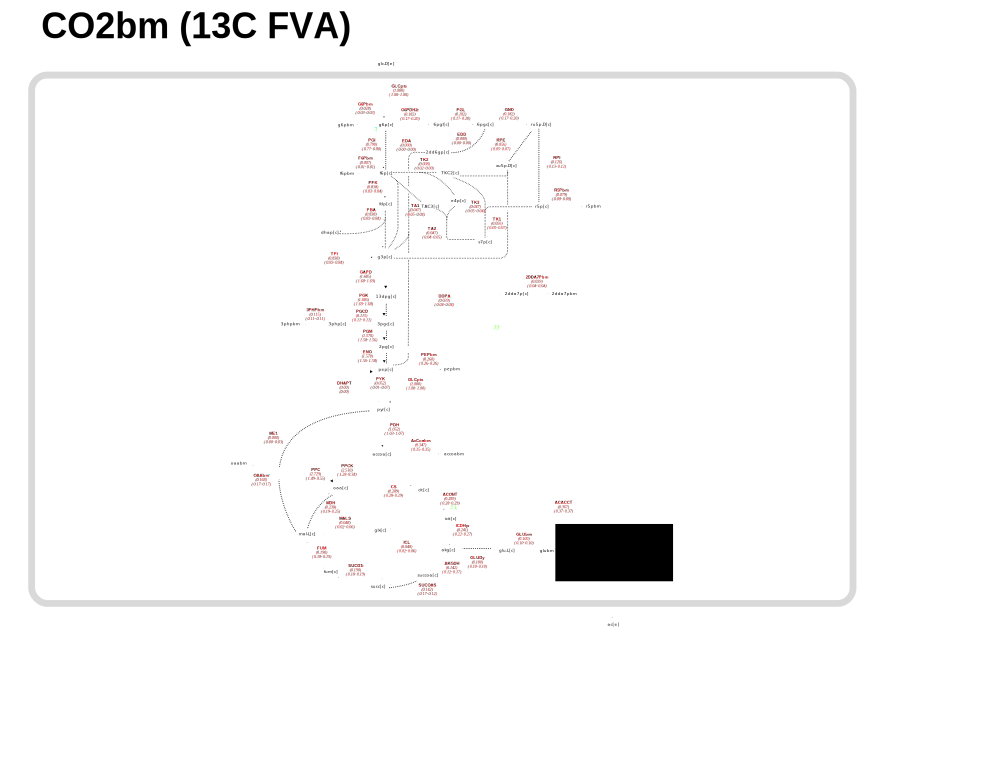

In [6]:
#Draw map
resultsNew.drawFluxes('ecoli'+strain+'New13C.svg',svgInFileName='TOYA13CMFA.svg',norm='GLCpts',oldVersion=True)
        
# Show map
SVG(filename='ecoli'+strain+'New13C.svg')        

In [7]:
resultsNew.reactionNetwork.reactionList.printFluxes(brief="False")

PPC: 	31.9044369779
PPCK: 	29.3433689944
PGK: 	-19.695440813
GAPD: 	19.695440813
PGM: 	-18.354640813
ENO: 	18.354640813
CO2bm: 	16.33
PDH: 	12.2951639296
GLCpts: 	11.69
TPI: 	9.79922701305
PFK: 	9.79922701305
FBA: 	9.79922701305
VALbm: 	9.315555288
PGI: 	9.23618253914
ACACCT: 	4.2882
AcCoabm: 	4.0618
CS: 	3.38238627305
ACONT: 	3.38238627305
PEPbm: 	3.043
ICDHyr: 	2.81960861652
MDH: 	2.77981828958
FUM: 	2.21704063305
SUCD1i: 	2.21704063305
G6PDH2r: 	2.12203246086
GND: 	2.12203246086
PGL: 	2.12203246086
OAAbm: 	1.9585
AKGDH: 	1.65426297652
SUCOAS: 	-1.65426297652
ALAbm: 	1.50908266996
RPI: 	-1.47265998695
3PHPbm: 	1.3408
PGCD: 	1.3408
GLUDy: 	-1.16534564
GLUbm: 	1.16534564
R5Pbm: 	0.9202743
RPE: 	0.649372473905
TK1: 	0.649372473905
PYK: 	0.605173929578
MALS: 	0.56277765653
ICL: 	0.56277765653
TA2: 	0.552385686952
TK3: 	-0.552385686952
TA1: 	-0.552385686952
DDPA: 	0.4553989
2DDA7Pbm: 	0.4553989
G6Pbm: 	0.331785
TK2: 	-0.0969867869523
F6Pbm: 	0.086328
PYRbm: 	1e-05
ME1: 	0.0
F6PA: 	0.0
EDA

In [8]:
print 'Fit:' +str(resultsNew.EMUlabel['fdp'])
print 'Exp:' +str(resultsNew.fragDict['fdp'].mdv)

Fit:[ 0.43061  0.24366  0.08718  0.0772   0.05093  0.01888  0.09155]
Exp:[ 0.381  0.244  0.081  0.116  0.041  0.017  0.119]


In [9]:
print 'Fit:' +str(resultsNew.EMUlabel['pep'])
print 'Exp:' +str(resultsNew.fragDict['pep'].mdv)

Fit:[ 0.62729  0.16237  0.0599   0.15045]
Exp:[ 0.624  0.165  0.06   0.151]
